以西兰花为例 102900005116714

In [97]:
import numpy as np
import pandas as pd
costPrice = pd.read_csv("../data/成本价按日期单品合并.csv",encoding='utf-8')
print(costPrice)
price = pd.read_csv("../data/单价按日期单品合并.csv",encoding='utf-8')
print(price)

            销售日期  102900005115762  102900005115779  102900005115786  \
0     2020-07-01             3.88             6.72             3.19   
1     2020-07-02             3.93             4.23             3.18   
2     2020-07-03             3.57             4.61             3.79   
3     2020-07-04             0.00             5.77             3.46   
4     2020-07-05             3.48             5.77             3.45   
...          ...              ...              ...              ...   
1090  2023-06-26             2.33             5.76             2.42   
1091  2023-06-27             2.34             5.74             2.47   
1092  2023-06-28             2.37             0.00             2.25   
1093  2023-06-29             2.37             5.68             2.16   
1094  2023-06-30             2.21             0.00             2.15   

      102900005115793  102900005115823  102900005115908  102900005115946  \
0                9.24             7.03             4.60             4.2

In [98]:
alpha = pd.DataFrame([])
alpha['销售日期']=pd.date_range(start='2020-07-01', end='2023-06-30', freq='D')
alpha = alpha.set_index('销售日期')


name = '102900005116714'

for index in price:
    for index1 in costPrice:
        if index[:-1] == name and index1 == name:
            #print(price[index])
            #print(costPrice[index1])
            alpha['alpha'] = (price[index].values/costPrice[index1].values - 1)*100

alpha = alpha.mask(alpha > 1000, 0)
print(alpha)


                alpha
销售日期                 
2020-07-01  51.679307
2020-07-02  57.303371
2020-07-03  56.075808
2020-07-04  51.024811
2020-07-05  47.835269
...               ...
2023-06-26  76.322418
2023-06-27  53.846154
2023-06-28  61.073826
2023-06-29  50.943396
2023-06-30  47.562582

[1095 rows x 1 columns]


C:\Users\1\AppData\Local\Temp\ipykernel_46928\4103754648.py:13: RuntimeWarning: invalid value encountered in divide
  alpha['alpha'] = (price[index].values/costPrice[index1].values - 1)*100


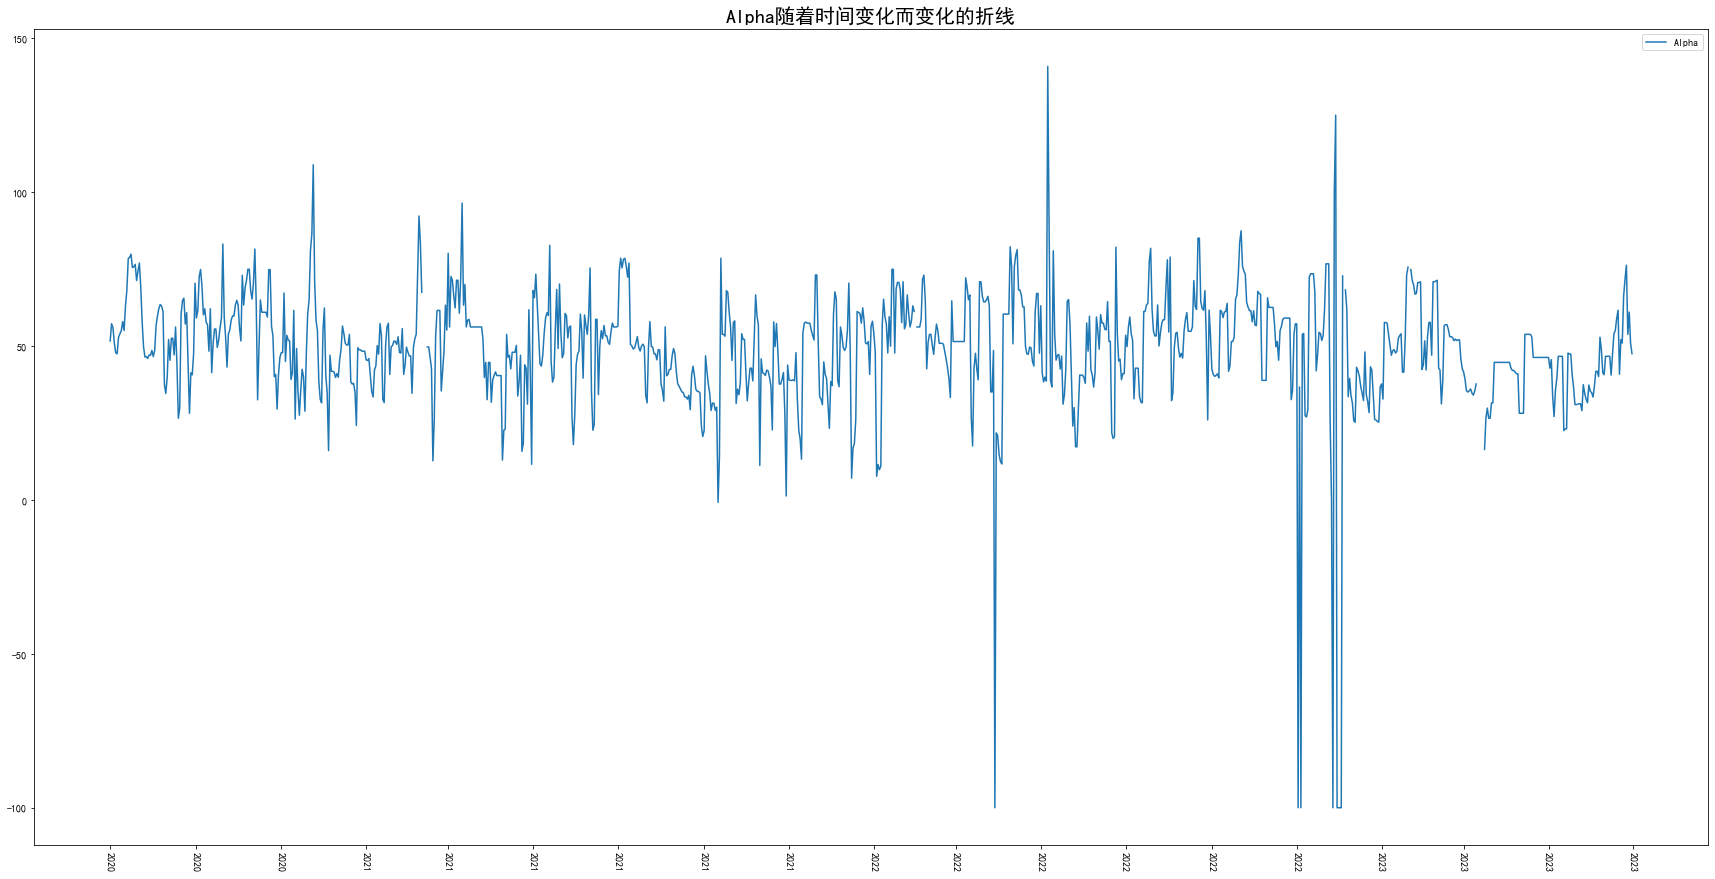

In [99]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
fig= plt.figure(figsize=(30,15))
plt.xticks(rotation=270, fontsize= 10)
import matplotlib.dates as mdates
ax=plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Alpha随着时间变化而变化的折线',fontsize = 20)
plt.plot(alpha, label='Alpha')
plt.legend()  # 生成图例
plt.savefig('../data/linecharts/Alpha随着时间变化而变化的折线.jpg')
plt.show()